In [ ]:
! kaggle datasets download prathumarikeri/indian-sign-language-isl
! unzip indian-sign-language-isl.zip

In [ ]:
Dataset_path = '/content/Indian/'

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

In [ ]:
import cv2 as cv2
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np

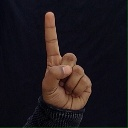

(128, 128, 3)


In [ ]:
img = cv2.imread(Dataset_path + '1/1.jpg',3)
cv2_imshow(img)
print(img.shape)

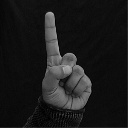

In [ ]:
img = cv2.imread(Dataset_path + '1/1.jpg',0)
cv2_imshow(img)

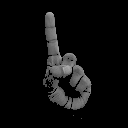

In [ ]:
img = cv2.imread(Dataset_path + '1/1.jpg',0)
ret,img = cv2.threshold(img,75,255,3)
cv2_imshow(img)

In [ ]:
import os
Output_path = '/content/Indian_bw/'
os.mkdir(Output_path)
for folder in os.listdir(Dataset_path):
  os.mkdir(Output_path + folder)
  for files in os.listdir(Dataset_path + folder):
    img = cv2.imread(Dataset_path + folder + '/' + files, 0)
    ret,img = cv2.threshold(img,75,255,3)
    cv2.imwrite((Output_path + folder + '/' + files), img)

In [ ]:
len(os.listdir(Dataset_path + '1'))

1200

In [ ]:
len(os.listdir(Output_path + '1'))

1200

In [ ]:
from pathlib import Path
Indian_Sign_Main_Path = Path('/content/Indian_bw/')

In [ ]:
Sign_JPG = list(Indian_Sign_Main_Path.glob(r"*/*.jpg"))

In [ ]:
Sign_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Sign_JPG))

In [ ]:
import pandas as pd
Sign_JPG_Series = pd.Series(Sign_JPG,name="JPG").astype(str)
Sign_Labels_Series = pd.Series(Sign_Labels,name="CATEGORY")

In [ ]:
Main_Sign_Data = pd.concat([Sign_JPG_Series,Sign_Labels_Series],axis=1)

In [ ]:
Main_Sign_Data = Main_Sign_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_Train,X_Test = train_test_split(Main_Sign_Data,train_size=0.9,random_state=123,shuffle=True)

In [ ]:
print(X_Train.shape)
print(X_Test.shape)

(38470, 2)
(4275, 2)


In [ ]:
import tensorflow as tf
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                            #rotation_range=90,
                            brightness_range=(0.5,1), 
                            #shear_range=0.2, 
                            #zoom_range=0.2,
                            channel_shift_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            rescale=1./255,
                            validation_split=0.3)

In [ ]:
Test_IMG_Generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
img_generator_flow_train = img_generator.flow_from_dataframe(dataframe=X_Train,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=16,
                                                   subset="training")

img_generator_flow_valid = img_generator.flow_from_dataframe(dataframe=X_Train,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=16,
                                                   subset="validation")

img_generator_flow_test = Test_IMG_Generator.flow_from_dataframe(dataframe=X_Test,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=16,
                                                   shuffle=False)

Found 26929 validated image filenames belonging to 35 classes.
Found 11541 validated image filenames belonging to 35 classes.
Found 4275 validated image filenames belonging to 35 classes.


In [ ]:
img_generator_flow_train.class_indices

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 'A': 9,
 'B': 10,
 'C': 11,
 'D': 12,
 'E': 13,
 'F': 14,
 'G': 15,
 'H': 16,
 'I': 17,
 'J': 18,
 'K': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'O': 23,
 'P': 24,
 'Q': 25,
 'R': 26,
 'S': 27,
 'T': 28,
 'U': 29,
 'V': 30,
 'W': 31,
 'X': 32,
 'Y': 33,
 'Z': 34}

In [ ]:
img_generator_flow_train.image_shape

(256, 256, 3)

In [ ]:
feature_layers = [
  Conv2D(32,kernel_size=3,padding='valid',use_bias = True, input_shape = (256,256,3)),
  Activation('relu'),
  Conv2D(32, kernel_size = 3),
  Activation('relu'),
  MaxPooling2D(pool_size=2),
  Dropout(0.25),
  Conv2D(32, kernel_size = 3),
  Activation('relu'),
  MaxPooling2D(pool_size=2),
  Dropout(0.5),
  Conv2D(32, kernel_size = 3),
  Activation('relu'),
  MaxPooling2D(pool_size=2),
  Dropout(0.25),
  Flatten(),
]

In [ ]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(35),
    Activation('softmax')
]

In [ ]:
model_1 = Sequential(feature_layers + classification_layers)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 32)      0         
                                                        

In [ ]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
custom_model_1 = model_1.fit(img_generator_flow_train ,
                      validation_data=img_generator_flow_valid,
                      epochs=5)

Epoch 1/5
1684/1684 [==============================] - 294s 168ms/step - loss: 0.6629 - accuracy: 0.8066 - val_loss: 0.0331 - val_accuracy: 0.9907
Epoch 2/5
1684/1684 [==============================] - 285s 169ms/step - loss: 0.1675 - accuracy: 0.9446 - val_loss: 0.0216 - val_accuracy: 0.9939
Epoch 3/5
1684/1684 [==============================] - 301s 179ms/step - loss: 0.1141 - accuracy: 0.9623 - val_loss: 0.0111 - val_accuracy: 0.9949
Epoch 4/5
1684/1684 [==============================] - 286s 170ms/step - loss: 0.0898 - accuracy: 0.9706 - val_loss: 0.0091 - val_accuracy: 0.9958
Epoch 5/5
1684/1684 [==============================] - 278s 165ms/step - loss: 0.0771 - accuracy: 0.9737 - val_loss: 0.0124 - val_accuracy: 0.9980


# VGG Transfer Learning


In [ ]:
! kaggle datasets download keras/vgg16
! unzip vgg16.zip

100% 541M/542M [00:18<00:00, 26.5MB/s]
100% 542M/542M [00:18<00:00, 30.0MB/s]
Archive:  vgg16.zip
  inflating: imagenet_class_index.json  
  inflating: vgg16_weights_tf_dim_ordering_tf_kernels.h5  
  inflating: vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5  


In [ ]:
from keras.applications.vgg16 import VGG16
weights = '/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
img_generator_flow_train_vgg = img_generator.flow_from_dataframe(dataframe=X_Train,
                                                   target_size=(224, 224),
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=16,
                                                   subset="training")

img_generator_flow_valid_vgg = img_generator.flow_from_dataframe(dataframe=X_Train,
                                                   target_size=(224, 224),
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=16,
                                                   subset="validation")

img_generator_flow_test_vgg = Test_IMG_Generator.flow_from_dataframe(dataframe=X_Test,
                                                   target_size=(224, 224),
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=16,
                                                   shuffle=False)

Found 26929 validated image filenames belonging to 35 classes.
Found 11541 validated image filenames belonging to 35 classes.
Found 4275 validated image filenames belonging to 35 classes.


In [ ]:
from tensorflow.keras.models import Model
vgg = VGG16(input_shape=[224,224] + [3], weights=weights, include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)

prediction=Dense(35,activation='softmax')(x)


model_2 = Model(inputs=vgg.input, outputs=prediction)

model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model_2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
vgg_model = model_2.fit(img_generator_flow_train_vgg ,
                      validation_data=img_generator_flow_valid_vgg,
                      epochs=1)

1684/1684 [==============================] - 306s 181ms/step - loss: 0.0650 - accuracy: 0.9869 - val_loss: 0.0012 - val_accuracy: 0.9997


# Custom Model


In [ ]:
model_3 = Sequential()

model_3.add(Conv2D(24,(3,3),activation="relu",input_shape=(256,256,3)))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D((2,2),strides=2))

model_3.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(Dropout(0.3))
model_3.add(MaxPooling2D((2,2),strides=2))

model_3.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(Dropout(0.3))
model_3.add(MaxPooling2D((2,2),strides=2))

model_3.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model_3.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model_3.add(Dropout(0.3))
model_3.add(MaxPooling2D((2,2),strides=2))

model_3.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model_3.add(Dropout(0.3))
model_3.add(MaxPooling2D((2,2),strides=2))

model_3.add(Flatten())
model_3.add(Dense(2352,activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(35,activation="softmax"))

In [ ]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [ ]:
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
model_3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 24)      672       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 24)     96        
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 24)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 127, 127, 64)      13888     
                                                                 
 dropout_10 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)     

In [ ]:
CNN_Model = model_3.fit(img_generator_flow_train,
                      validation_data = img_generator_flow_test,
                      callbacks=[Early_Stopper],
                      epochs=20)

Epoch 1/20
1684/1684 [==============================] - 210s 123ms/step - loss: 0.2938 - accuracy: 0.9229 - val_loss: 0.0670 - val_accuracy: 0.9974
Epoch 2/20
1684/1684 [==============================] - 206s 122ms/step - loss: 0.0548 - accuracy: 0.9859 - val_loss: 0.0214 - val_accuracy: 0.9972
Epoch 3/20
1684/1684 [==============================] - 205s 122ms/step - loss: 0.0300 - accuracy: 0.9931 - val_loss: 0.0111 - val_accuracy: 0.9991
Epoch 4/20
1684/1684 [==============================] - 204s 121ms/step - loss: 0.0391 - accuracy: 0.9928 - val_loss: 0.0147 - val_accuracy: 0.9981
Epoch 5/20
1684/1684 [==============================] - 203s 120ms/step - loss: 0.0193 - accuracy: 0.9948 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/20
1684/1684 [==============================] - 204s 121ms/step - loss: 0.0132 - accuracy: 0.9965 - val_loss: 0.0148 - val_accuracy: 0.9949
Epoch 7/20
1684/1684 [==============================] - 205s 122ms/step - loss: 0.0241 - accuracy: 0.9940 - val_

In [ ]:
Model_Results = model_3.evaluate(img_generator_flow_test)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

268/268 [==============================] - 9s 32ms/step - loss: 2.2470e-04 - accuracy: 1.0000
LOSS:  0.0002
ACCURACY:  1.00


In [ ]:
Model_Test_Prediction = model_3.predict(img_generator_flow_test)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [ ]:
def predicted_class(prediction):
  string = '123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
  return(string[prediction])

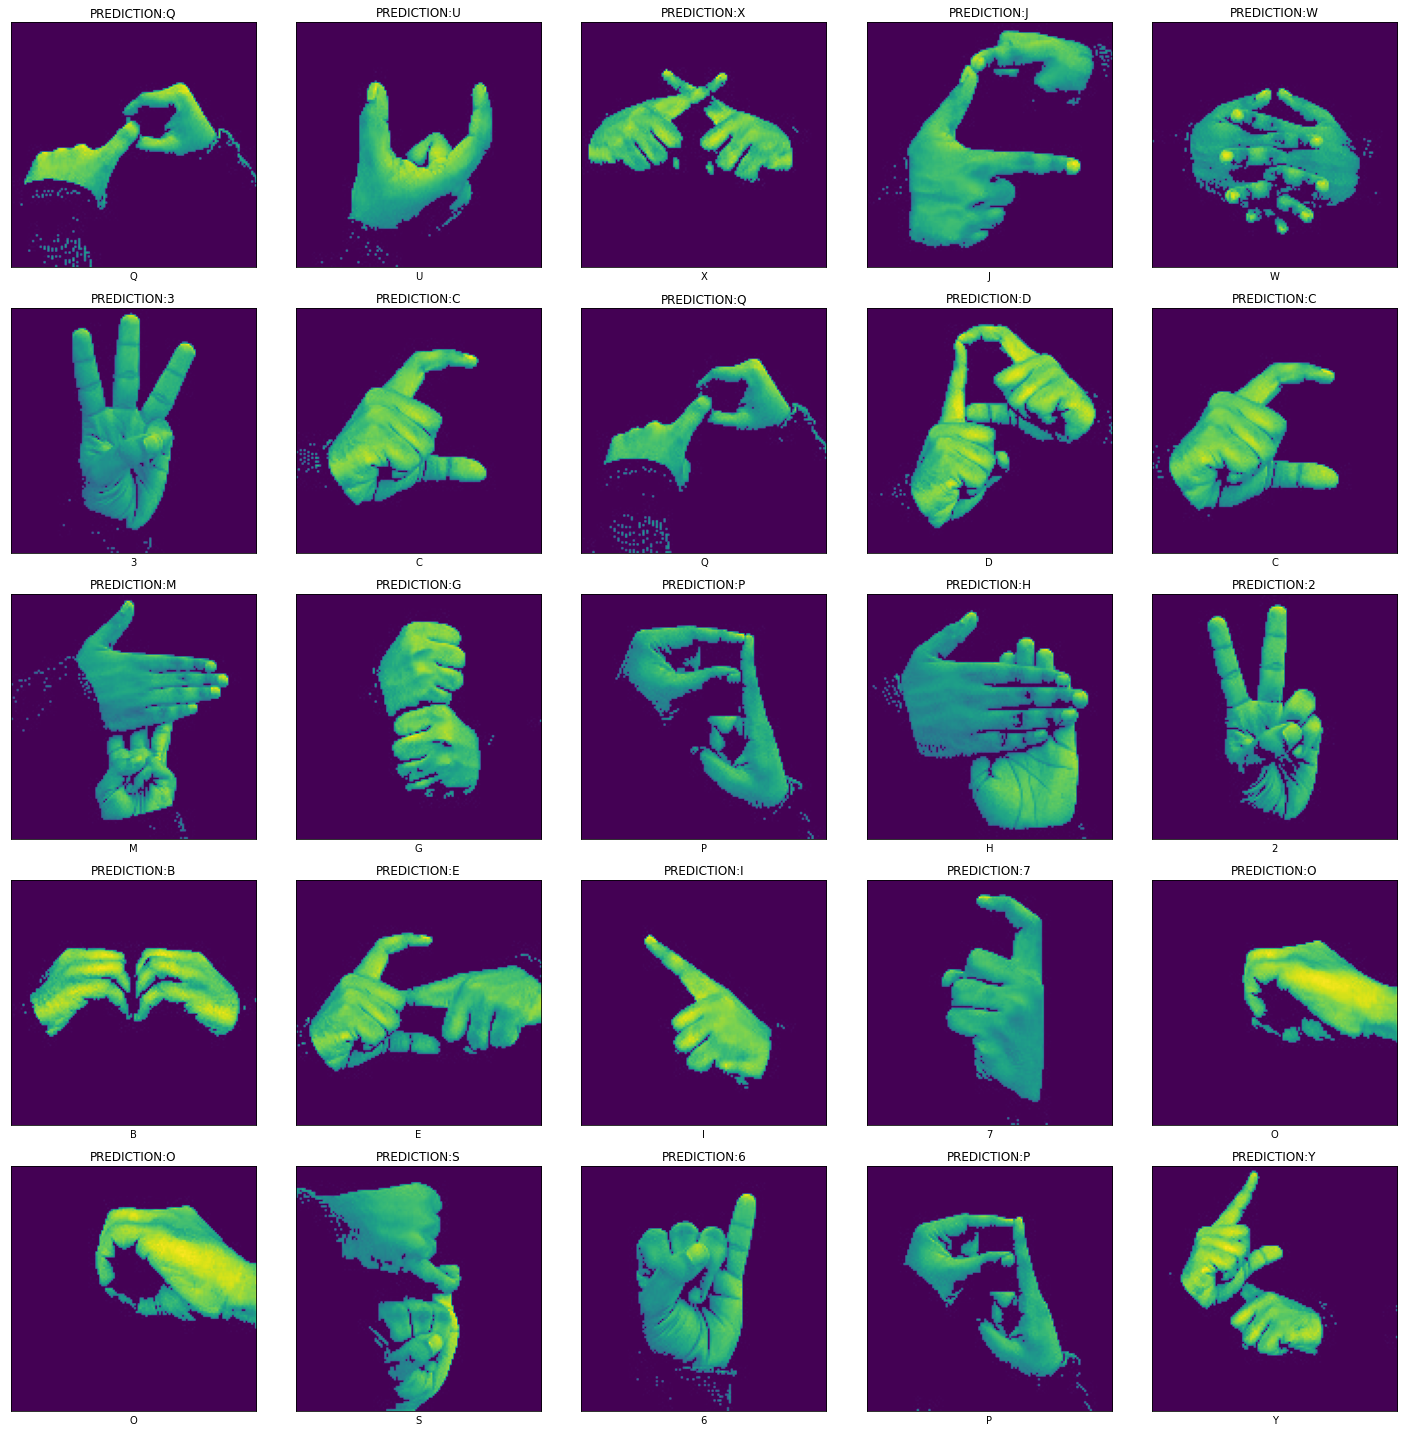

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(X_Test["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{predicted_class(Model_Test_Prediction[i])}")
    ax.set_xlabel(X_Test["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()